# ToyBrain dataset tutorial:
# How to generate a ToyBrain dataset with a desired `image <--> covariates` relationship ?

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# standard python packages
import os, sys
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
from sklearn import datasets, linear_model
from tqdm.notebook import tqdm
import random
import math
import json

from create_toybrains import ToyBrainsData
from utils.vizutils import *

the list of image attributes and their possible state can be seen with:

In [3]:
ToyBrainsData().show_all_states()


Image attributes (fixed):
Name                States                                                                      Weights
------------------  --------------------------------------------------------------------------  ----------------------------
brain-vol_radminor  [20 21 22 23 24]                                                            [1. 1. 1. 1. 1.]
brain-vol_radmajor  [26 27 28 29 30]                                                            [1. 1. 1. 1. 1.]
brain_thick         [1 2 3 4]                                                                   [1. 1. 1. 1.]
brain-int_fill      [210 200 190 180 170]                                                       [1. 1. 1. 1. 1.]
brain-int_border    ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']          [1. 1. 1. 1.]
vent_thick          [1 2 3 4]                                                                   [1. 1. 1. 1.]
shape-top_curv      [ 3  4  5  6  7  8  9 10 11]                           

## (Step 1) Create a configuration file
that contains, <br>
(a) the list of covariates and labels <br>
(b) the relationship between each covaraite and the image generation attributes <br><br>

The config can be stored in `configs/` folder as shown below:

In [4]:
! head -30 configs/lbl1cov1_base.py

head: cannot open 'configs/lbl1cov1_base.py' for reading: No such file or directory


### Check the configuration

In [5]:
toy = ToyBrainsData(config='configs.lbl1cov1.py', debug=True)

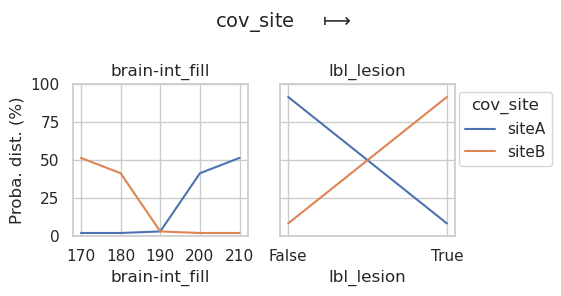

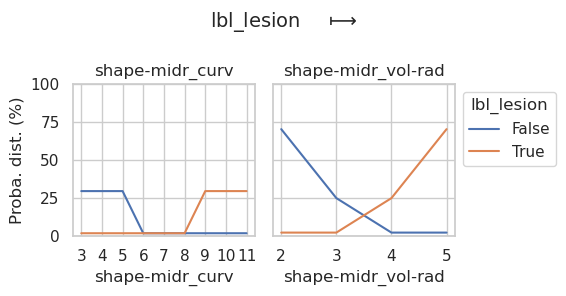

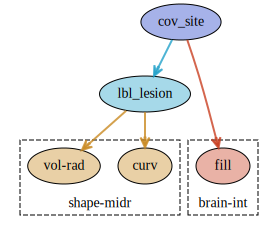

In [6]:
toy.show_current_config() # also returns the nodes and connections of the causal graph

the nodes and edges of the causal graph can also be obtained as a list

In [7]:
toy.CGM_nodes, toy.CGM_edges

(['brain-int_fill',
  'cov_site',
  'lbl_lesion',
  'shape-midr_curv',
  'shape-midr_vol-rad'],
 [('cov_site', 'brain-int_fill'),
  ('cov_site', 'lbl_lesion'),
  ('lbl_lesion', 'shape-midr_curv'),
  ('lbl_lesion', 'shape-midr_vol-rad')])

Compare with another more complex config with 5 labels and 3 covariates

In [8]:
# add a tweaking config "lbl5cov3_tweak2.py" that will make the probability distributions 
# extremely distinct for all covariates AND it also creates a link between cov_site and shape-midl_int
toy2 = ToyBrainsData(config='configs.lbl5cov3')

TODO: plot differences in the distributions instead @Jihoon

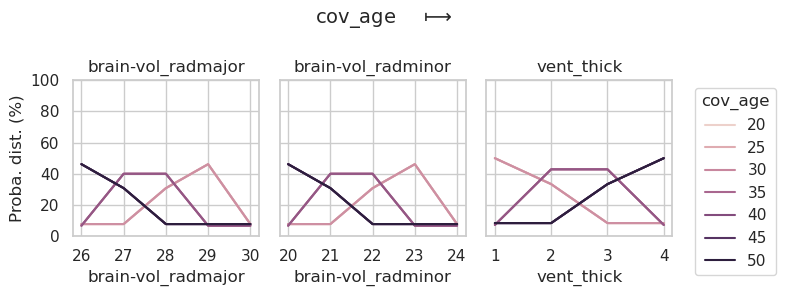

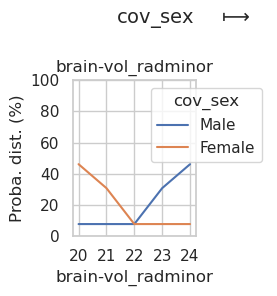

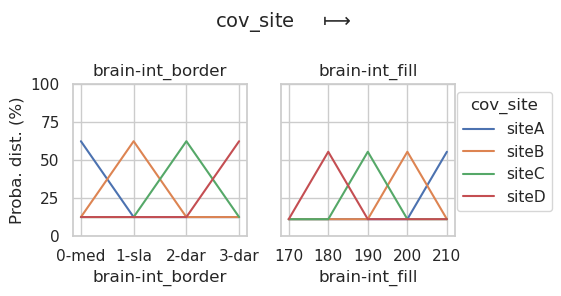

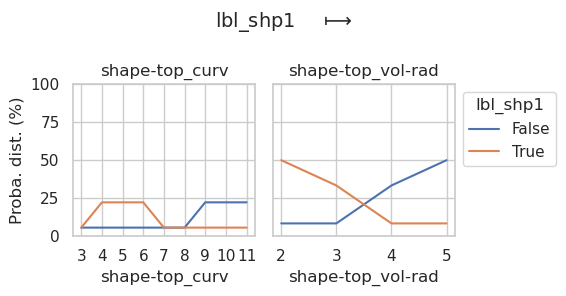

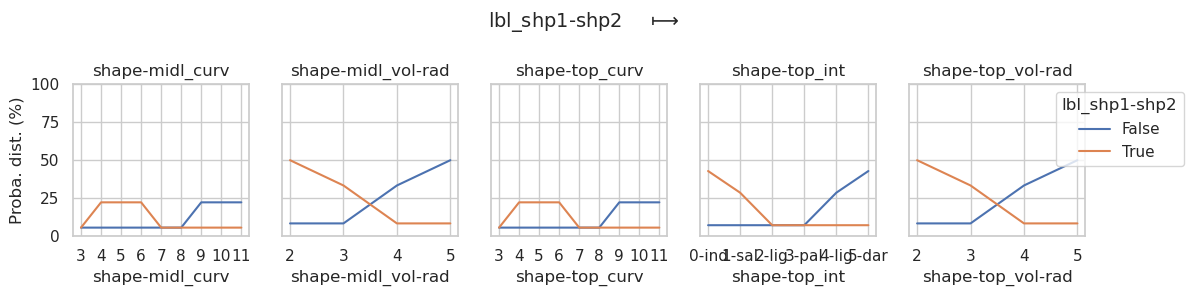

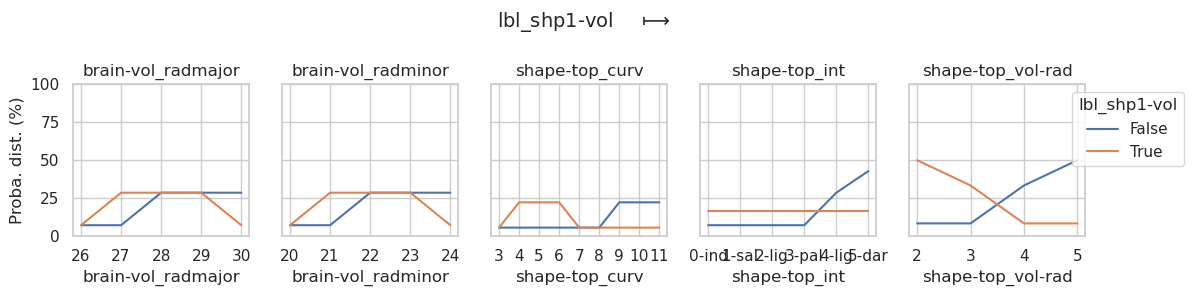

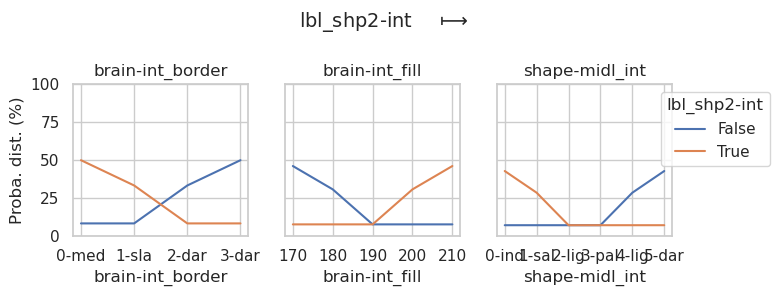

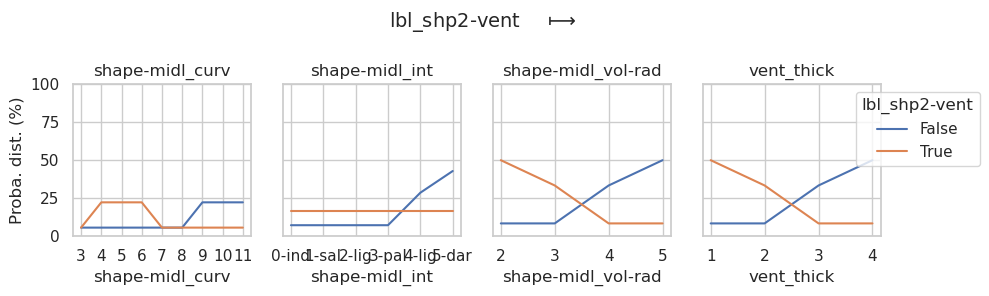

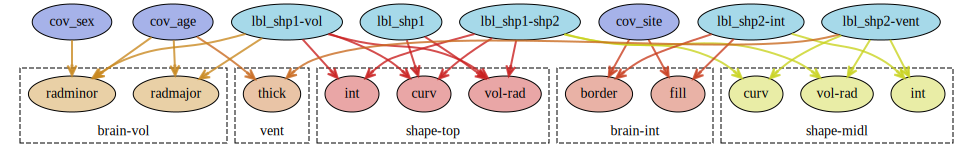

In [9]:
toy2.show_current_config()

## (Step 2) Generate data table 
Sample the dataset and verify how the distributions will look. 
If some distribution isn't as expected then go back to step 1 and edit the config file accordingly.

In [12]:
df = toy.generate_dataset_table(n_samples=1000)

Generative parameter        |        States 
------------------------------------------------------------
brain-vol_radminor         [20 21 22 23 24]
brain-vol_radmajor         [26 27 28 29 30]
brain_thick                [1 2 3 4]
brain-int_fill             [210 200 190 180 170]
brain-int_border           ['0-mediumslateblue' '1-slateblue' '2-darkslateblue' '3-darkblue']
vent_thick                 [1 2 3 4]
shape-top_curv             [ 3  4  5  6  7  8  9 10 11]
shape-top_int              ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-top_vol-rad          [2 3 4 5]
shape-midr_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midr_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkgreen']
shape-midr_vol-rad         [2 3 4 5]
shape-midl_curv            [ 3  4  5  6  7  8  9 10 11]
shape-midl_int             ['0-indianred' '1-salmon' '2-lightsalmon' '3-palegoldenrod' '4-lightgreen'
 '5-darkg

  0%|          | 0/1000 [00:00<?, ?it/s]

### Visualize the dataframe dist.

In [13]:
df.head()

,cov_site,lbl_lesion,brain-int_border,brain-int_fill,brain-vol_radmajor,brain-vol_radminor,brain_thick,shape-botl_curv,shape-botl_int,shape-botl_vol-rad,...,shape-top_curv,shape-top_int,shape-top_vol-rad,vent_thick,brain-vol,shape-top_vol,shape-midr_vol,shape-midl_vol,shape-botr_vol,shape-botl_vol
subjectID,,,,,,,,,,,,,,,,,,,,,
00000,siteB,True,0-mediumslateblue,170,28,22,1,8,1-salmon,4,...,11,5-darkgreen,5,1,1935.221075,77.476453,76.954532,27.000000,23.382686,48.983479
00001,siteB,True,2-darkslateblue,170,29,24,4,3,5-darkgreen,5,...,3,1-salmon,2,4,2186.548487,10.392305,49.250901,27.811529,75.929654,64.951905
00002,siteA,True,0-mediumslateblue,200,29,24,3,9,4-lightgreen,4,...,4,5-darkgreen,4,2,2186.548487,45.254834,76.954532,47.022820,12.360680,49.250901
00003,siteB,True,0-mediumslateblue,180,28,22,1,8,5-darkgreen,5,...,5,3-palegoldenrod,5,3,1935.221075,73.473157,76.954532,26.450336,70.710678,76.536686
00004,siteA,False,0-mediumslateblue,210,30,22,4,9,2-lightsalmon,5,...,6,4-lightgreen,5,1,2073.451151,75.000000,10.392305,25.455844,49.584930,76.954532


#### (a) Viz image attributes vs covariates dist.

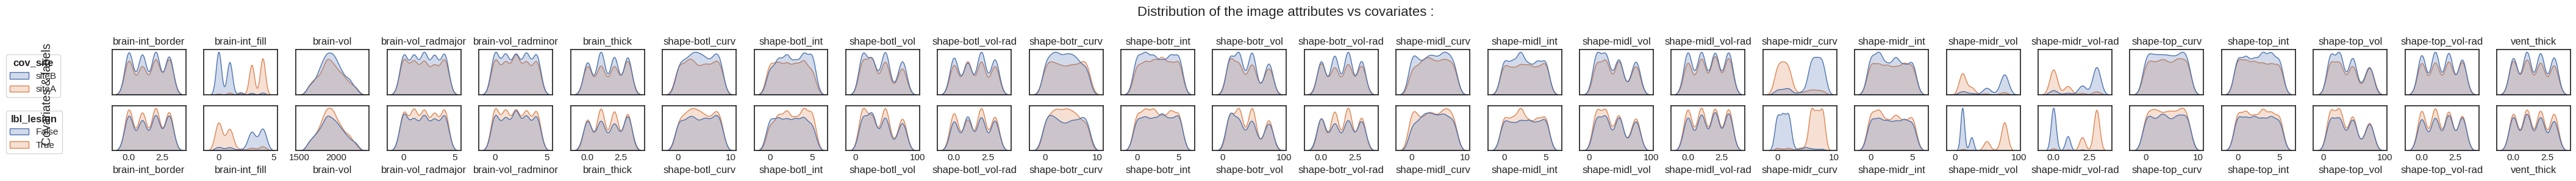

In [17]:
cov_cols = df.filter(regex='^(cov_|lbl_)').columns
attr_cols = df.filter(regex='^(?!(cov_|lbl_)).+').columns
plot_col_dists(df, 
               attr_cols=attr_cols, 
               cov_cols=cov_cols, 
               title="Distribution of the image attributes vs covariates :")
plt.show()

#### (b) Viz dist. of all variables in the dataset

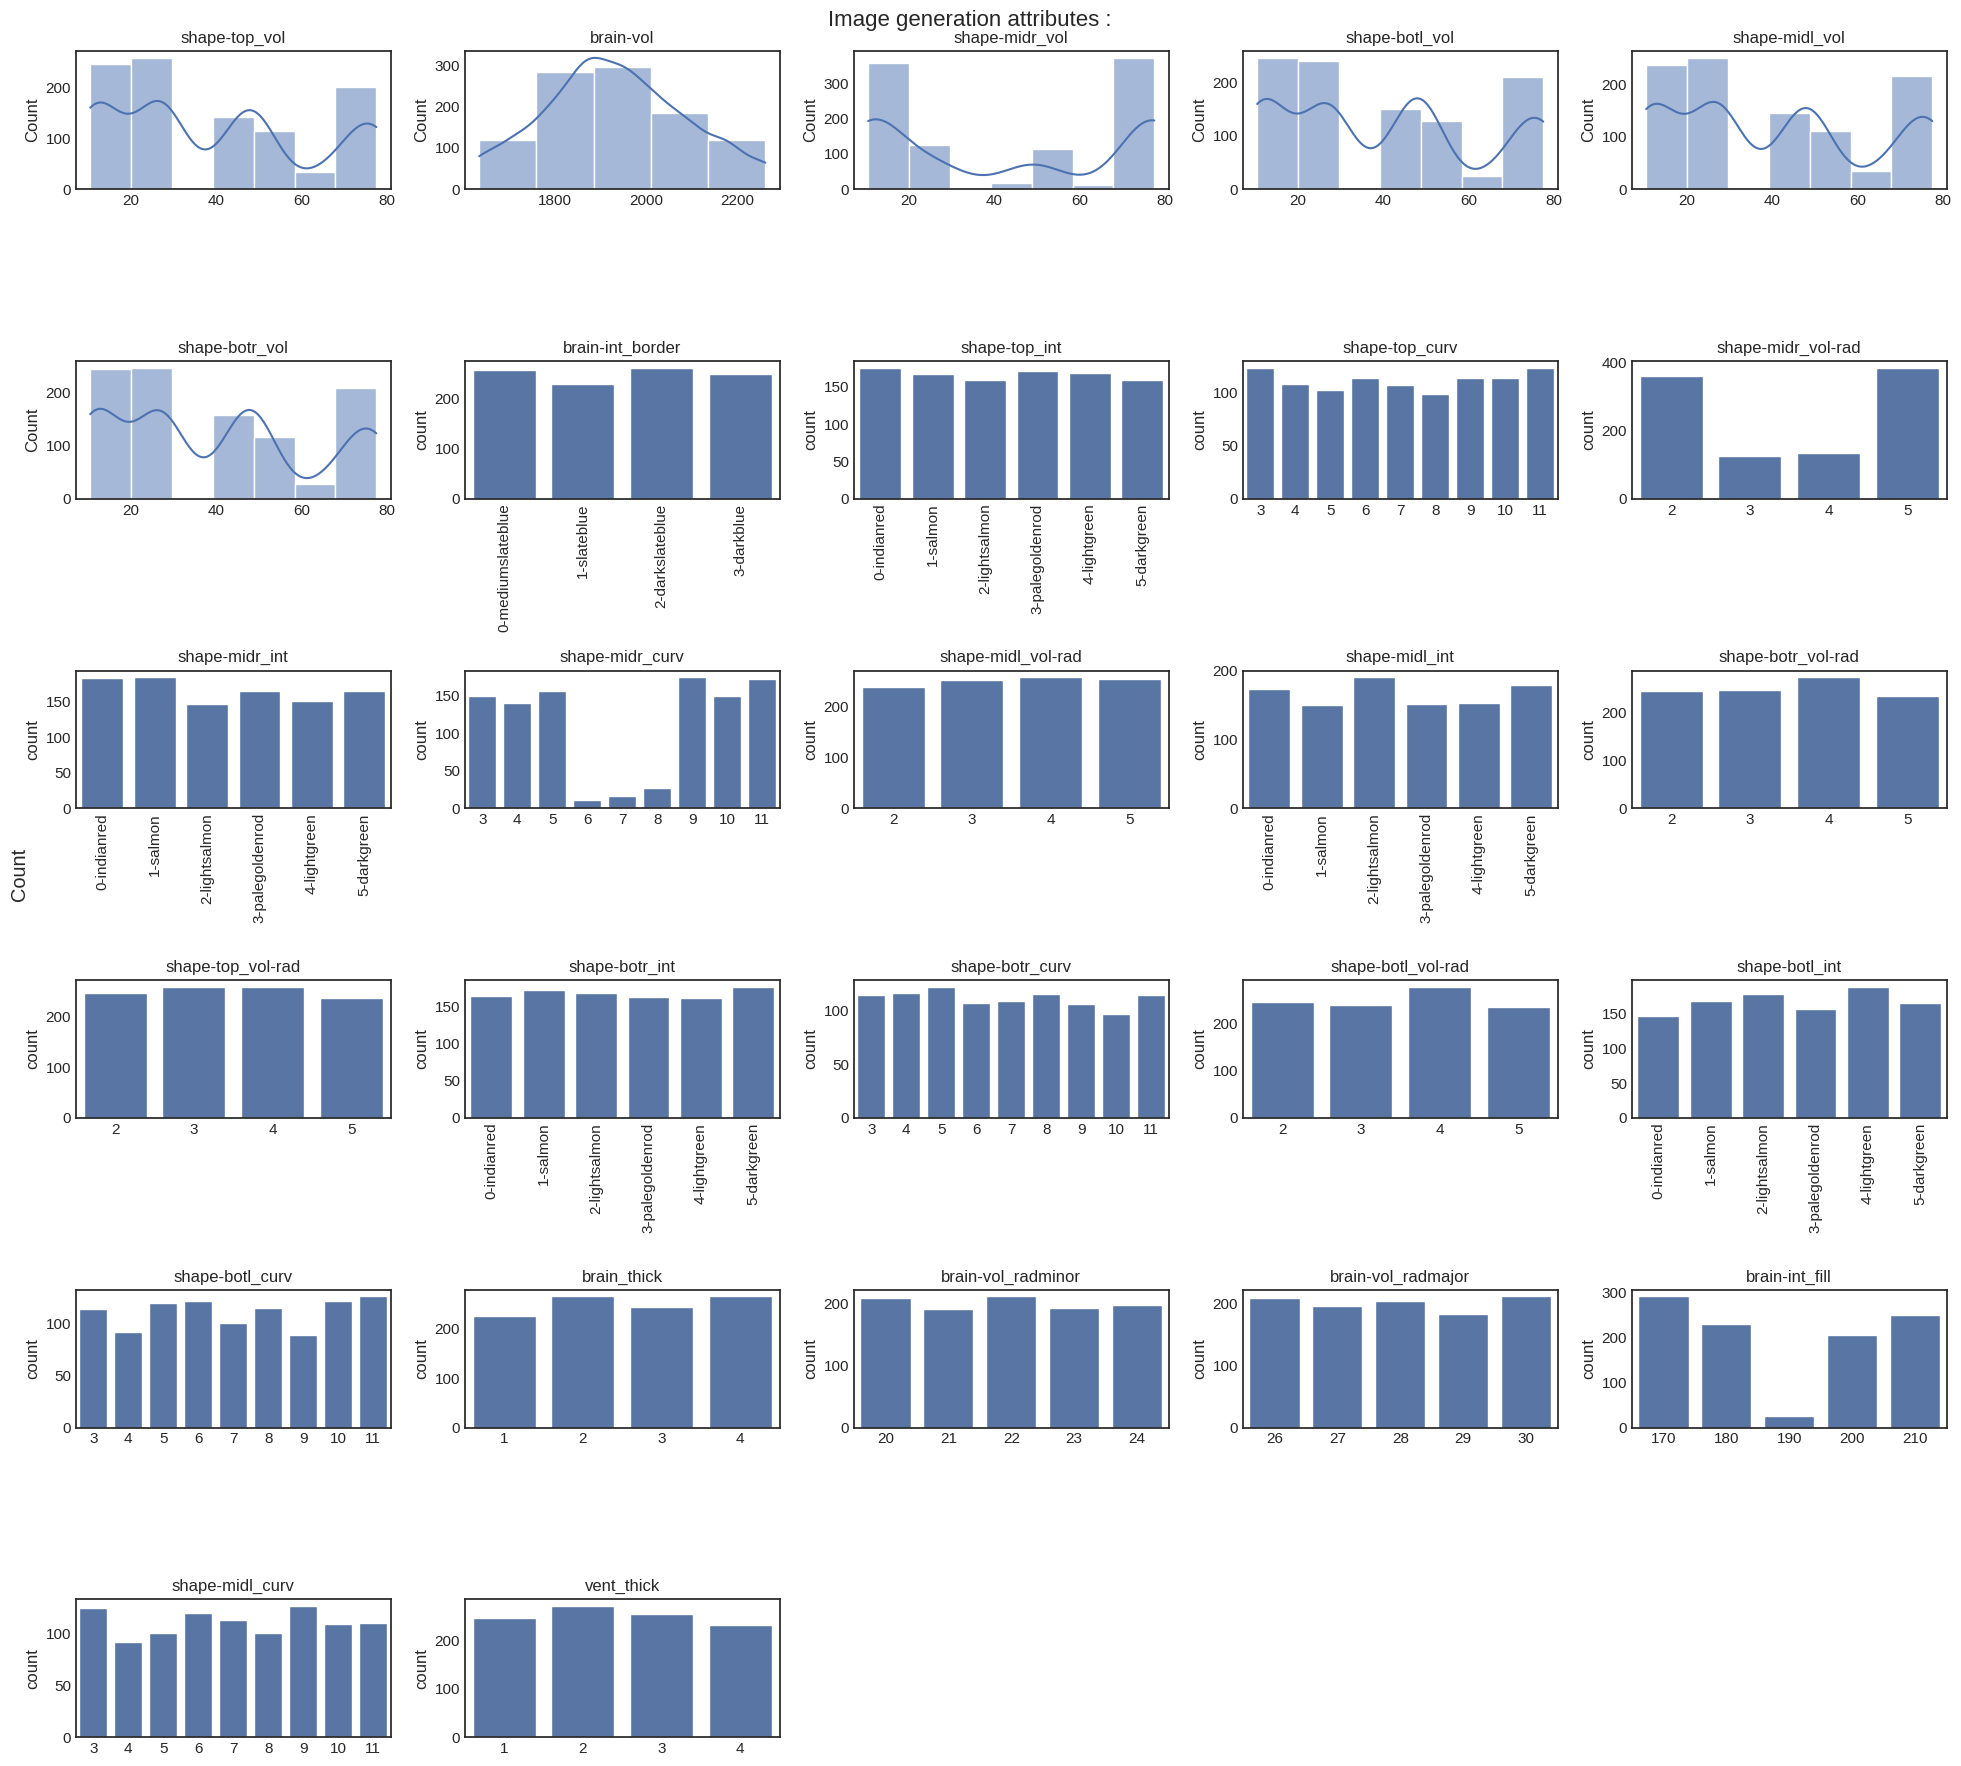

In [19]:
# get all column names starting with 'gen_'
plot_col_counts(df[attr_cols], title="Image generation attributes :")
plt.show()

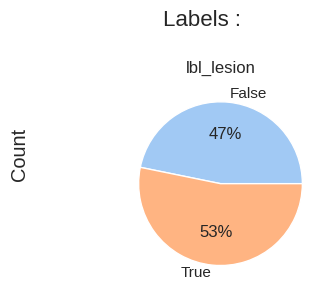

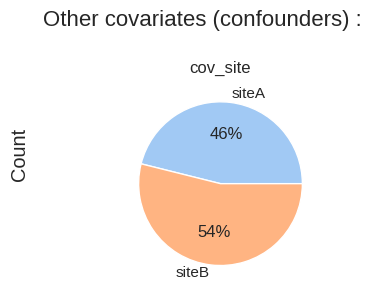

In [22]:
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^lbl'), title="Labels :")
plt.show()
# get all column names starting with 'gen_'
plot_col_counts(df.filter(regex='^cov_'), title="Other covariates (confounders) :")
plt.show()

## (Step 3) Baseline prediction accuracies
Fit a logistic regression model to predict all labels and covariates from image attributes. <br>
This shows a ground-truth upper bound for the dataset. <br>

In [41]:
df_results = toy.fit_baseline_models(
    input_feature_types=["attr_subsets", "cov_subsets"], 
    debug=False)

running a total of 35 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000


  0%|          | 0/35 [00:00<?, ?it/s]

TOTAL RUNTIME: 0:00:05


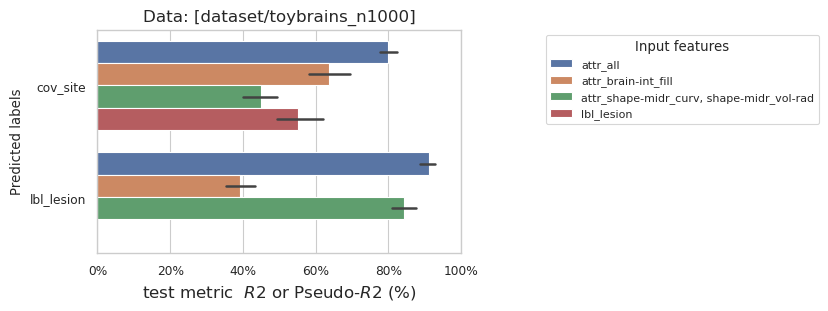

In [42]:
toy.viz_baseline_results(df_results)

We can also inspect the results a bit more such as looking for signs of overfitting <br>
(ratio of train_metric to test_metric

In [43]:
toy._show_baseline_results()

### Compare with the another similar config
in which the label is harder to predict than before but the confounder is easier to predict

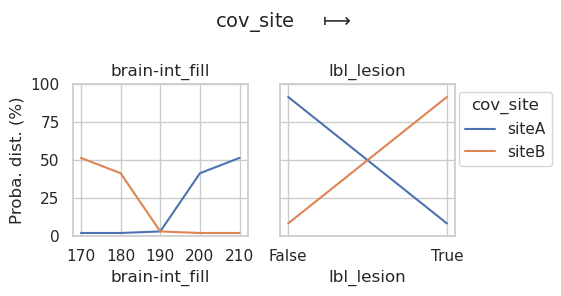

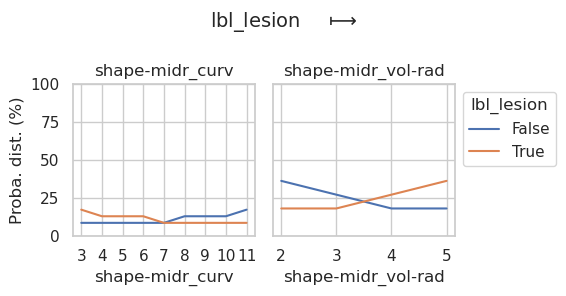

In [44]:
toy3 = ToyBrainsData("configs.lbl1cov1_lowsignal")
_ = toy3.show_current_config()

In [45]:
df3 = toy3.generate_dataset_table(n_samples=1000, outdir_suffix="n_lowsignal")

Sampling n=1000 toybrain image settings


  0%|          | 0/1000 [00:00<?, ?it/s]

In [46]:
df_results3 = toy3.fit_baseline_models(debug=False)

running a total of 35 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000_lowsignal


  0%|          | 0/35 [00:00<?, ?it/s]

TOTAL RUNTIME: 0:00:02


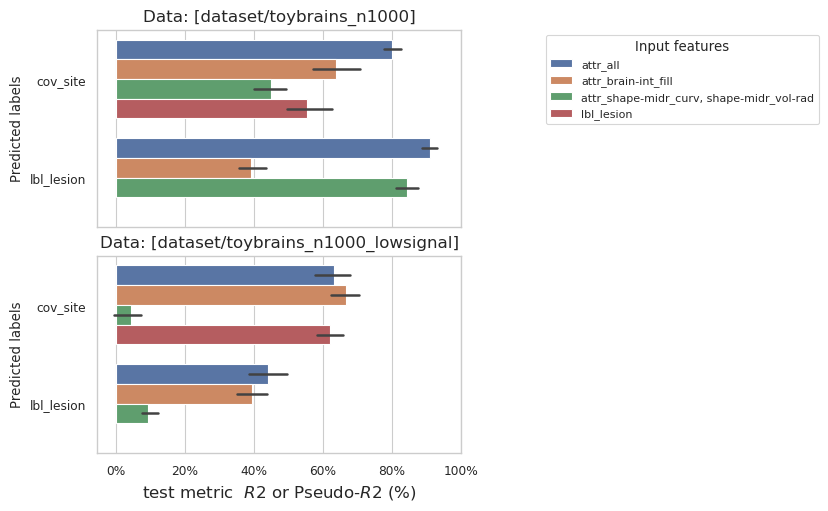

In [47]:
toy3.viz_baseline_results([df_results, df_results3])

Compare with another complex config

In [50]:
toy2.generate_dataset_table(1000)

Sampling n=1000 toybrain image settings


  0%|          | 0/1000 [00:00<?, ?it/s]

,cov_age,cov_sex,cov_site,lbl_shp1,lbl_shp1-shp2,lbl_shp1-vol,lbl_shp2-int,lbl_shp2-vent,brain-int_border,brain-int_fill,...,shape-top_curv,shape-top_int,shape-top_vol-rad,vent_thick,brain-vol,shape-top_vol,shape-midr_vol,shape-midl_vol,shape-botr_vol,shape-botl_vol
subjectID,,,,,,,,,,,,,,,,,,,,,
00000,40,Female,siteA,False,False,False,False,False,0-mediumslateblue,180,...,3,4-lightgreen,4,4,1847.256480,41.569219,77.476453,48.000000,11.755705,45.254834
00001,37,Female,siteC,True,False,False,False,True,2-darkslateblue,190,...,3,2-lightsalmon,2,1,1847.256480,10.392305,25.455844,75.000000,64.951905,11.313708
00002,46,Male,siteB,False,True,True,True,True,2-darkslateblue,200,...,4,1-salmon,2,4,2035.752040,11.313708,12.396233,26.450336,11.755705,73.473157
00003,44,Male,siteA,False,True,True,True,False,0-mediumslateblue,210,...,9,0-indianred,2,4,2186.548487,12.312725,48.983479,11.313708,49.584930,41.569219
00004,32,Female,siteA,False,False,False,False,True,0-mediumslateblue,170,...,11,3-palegoldenrod,5,2,2261.946711,77.476453,12.000000,26.450336,11.313708,27.811529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00995,35,Male,siteC,True,False,True,False,False,2-darkslateblue,190,...,6,5-darkgreen,5,1,1979.203372,75.000000,73.473157,49.250901,27.000000,25.455844
00996,39,Male,siteD,False,False,False,False,False,3-darkblue,180,...,11,5-darkgreen,4,3,2023.185669,49.584930,76.954532,49.584930,45.254834,12.148745
00997,30,Female,siteC,True,True,False,True,True,0-mediumslateblue,210,...,6,2-lightsalmon,3,3,2111.150263,27.000000,11.755705,11.313708,27.811529,47.022820


In [51]:
df_results2 = toy2.fit_baseline_models(
    input_feature_types=["attr_subsets", "cov_subsets"], 
    debug=False)

running a total of 400 different settings of [input] x [output] x [CV] and saving result in dataset/toybrains_n1000


  0%|          | 0/400 [00:00<?, ?it/s]

TOTAL RUNTIME: 0:00:21


/ritter/roshan/workspace/toybrains/create_toybrains.py:888: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  # plt.suptitle("Baseline Analysis Plot", fontsize=fs+2)


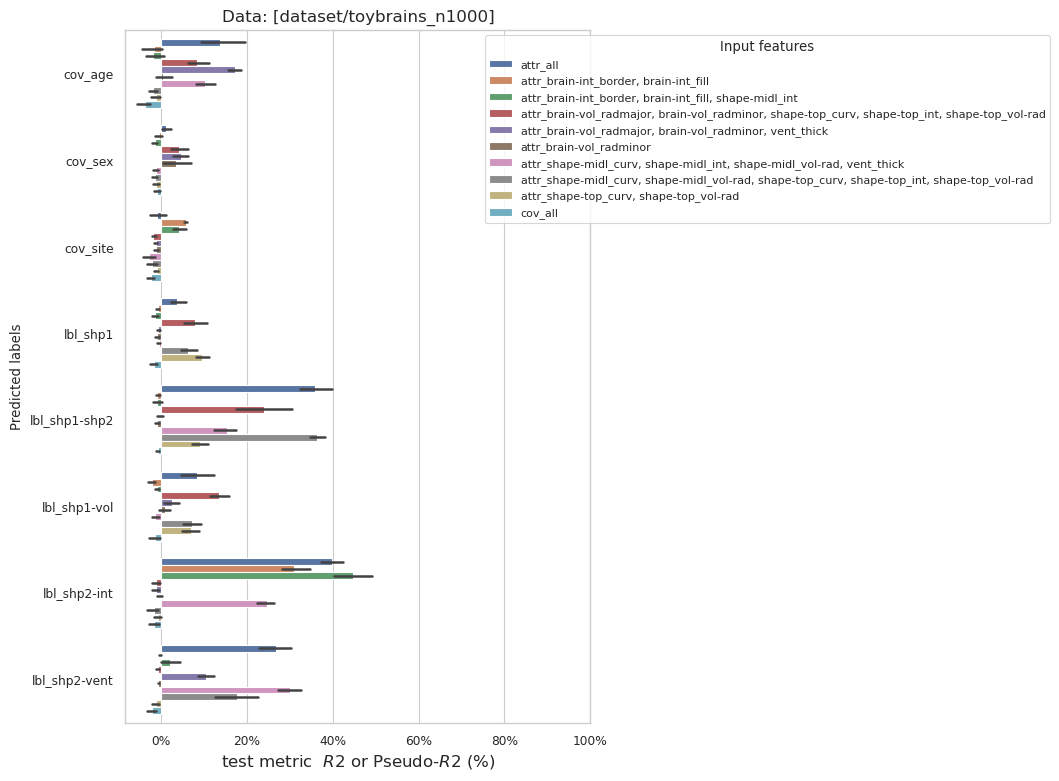

In [53]:
toy2.viz_baseline_results(df_results2)

## (Step 4) Generate full dataset with images

In [112]:
toy.generate_dataset_images(n_jobs=10)

Generating n=1000 toybrain images


  0%|          | 0/1000 [00:00<?, ?it/s]

Visualize some of the generated images

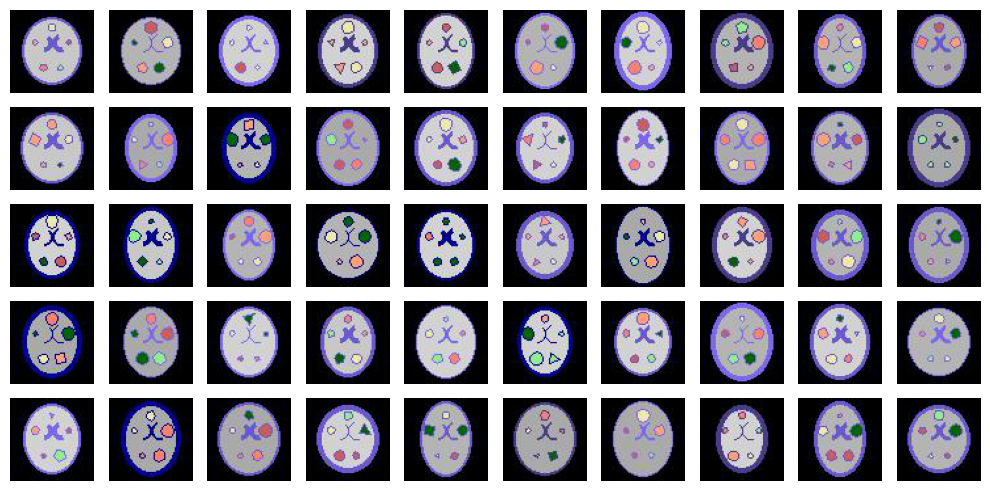

In [113]:
img_files = sorted(glob(f"{toy.OUT_DIR_SUF}/images/*.jpg"))
show_images(img_files=img_files, n_rows=5)

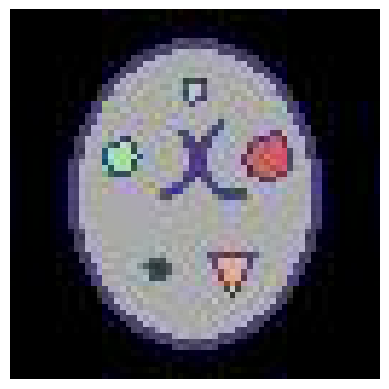

In [114]:
# one random image in detail
img_file = np.random.choice(img_files)
img = mpimg.imread(img_file)
f = plt.figure(frameon=False)
plt.imshow(img)
plt.axis('off')
# plt.savefig("docs/brain.png", bbox_inches='tight')
plt.show()

also generate for the second config

In [115]:
toy3.generate_dataset_images() 

Generating n=1000 toybrain images


  0%|          | 0/1000 [00:00<?, ?it/s]

## Step 2 & 3 can be run together
with 
```python 
toy.generate_dataset(n_samples=1000)
```
that internally calls
```python 
toy.generate_dataset_table(n_samples=1000)
toy.generate_dataset_images()
```

Alternatively, toybrains dataset can be generated from the command line directly as follows:

In [116]:
# generating 100 samples with debug switch turned on
! python3 create_toybrains.py -c configs.lbl5cov3_base -n 100 -d 

Traceback (most recent call last):
  File "create_toybrains.py", line 921, in <module>
    dataset = ToyBrainsData(out_dir=args.dir, 
  File "create_toybrains.py", line 121, in __init__
    config = importlib.import_module(config)
  File "/ritter/roshan/installations/anaconda3/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 973, in _find_and_load_unlocked
ModuleNotFoundError: No module named 'configs.lbl5cov3_base'
